### Requisitos 6, 7 y 9. **Análisis de Correlación, Análisis de Outliers y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

1. **Matriz de Correlación:** 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.

2. **Análisis de Dispersión entre Variables Clave:** 
   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.

3. **Predicciones Mensuales Usando Datos Trimestrales:**
   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

4. **Predicciones Trimestrales:**
   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

5. **Predicciones Anuales:**
   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

6. **Desarrollo de Modelos de Regresión Múltiple:** 
   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.

7. **Análisis de Coeficientes de Regresión Múltiple:**
   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.

8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.

9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**
   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.

10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**
    - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
    - **Esperado:** 
      - Ajusta modelos de regresión lineal y polinómica.
      - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
      - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.



In [1]:
import pandas as pd
import os

#cargar datos
current_path = os.getcwd()
aguacate_index = current_path.find("uoc-proyecto3")
if aguacate_index != -1:
        project_root = current_path[:aguacate_index + len("uoc-proyecto3")]
else:
    raise FileNotFoundError("The directory 'uoc-proyecto3' was not found in the path.")
data_path = os.path.join(project_root, 'data', 'Avocado_HassAvocadoBoard_20152023v1.0.1.csv')
dataset_avocado_original_df = pd.read_csv(data_path)


region_classification = {
    'Albany': 'City',
    'Atlanta': 'City',
    'BaltimoreWashington': 'Region',
    'BirminghamMontgomery': 'Region',
    'Boise': 'City',
    'Boston': 'City',
    'BuffaloRochester': 'Region',
    'California': 'GreaterRegion',
    'Charlotte': 'City',
    'Chicago': 'City',
    'CincinnatiDayton': 'Region',
    'Columbus': 'City',
    'DallasFtWorth': 'Region',
    'Denver': 'City',
    'Detroit': 'City',
    'GrandRapids': 'City',
    'GreatLakes': 'GreaterRegion',
    'HarrisburgScranton': 'Region',
    'HartfordSpringfield': 'Region',
    'Houston': 'City',
    'Indianapolis': 'City',
    'Jacksonville': 'City',
    'LasVegas': 'City',
    'LosAngeles': 'City',
    'Louisville': 'City',
    'Miami': 'City',
    'MiamiFtLauderdale': 'Region',
    'Midsouth': 'GreaterRegion',
    'Nashville': 'City',
    'NewOrleans': 'City',
    'NewYork': 'City',
    'Northeast': 'GreaterRegion',
    'NorthernNewEngland': 'Region',
    'Orlando': 'City',
    'PeoriaSpringfield': 'Region',
    'Philadelphia': 'City',
    'PhoenixTucson': 'Region',
    'Pittsburgh': 'City',
    'Plains': 'GreaterRegion',
    'Portland': 'City',
    'Providence': 'City',
    'RaleighGreensboro': 'Region',
    'RichmondNorfolk': 'Region',
    'Roanoke': 'City',
    'Sacramento': 'City',
    'SanDiego': 'City',
    'SanFrancisco': 'City',
    'Seattle': 'City',
    'SouthCarolina': 'Region',
    'SouthCentral': 'GreaterRegion',
    'Southeast': 'GreaterRegion',
    'Spokane': 'City',
    'StLouis': 'City',
    'Syracuse': 'City',
    'Tampa': 'City',
    'Toledo': 'City',
    'TotalUS': 'TotalUS',
    'West': 'GreaterRegion',
    'WestTexNewMexico': 'Region',
    'Wichita': 'City'
}

def map_regions(original_data: pd.DataFrame, region_map: dict, guardar: bool = False) -> pd.DataFrame:
    """
    Asigna la clasificación de regiones y ciudades al dataframe original de aguacate
    en una nueva columna region_type

    Parametros:
    - original_data: pd.DataFrame-  Datos originales avocado.csv
    - region_map: Dict[str, str] - El mapping de agrupaciones
    - guardar: Boolean - True or False para guardar nuevo csv o no

    Regresa:
    - pd.DataFrame: Dataframe actualizado de los datos originales
    """

    path_salida = "data/avocado_with_region_types.csv"
    nuevo_aguacate_df = original_data.copy()
    nuevo_aguacate_df['region_type'] = nuevo_aguacate_df['region'].map(region_map)
    if guardar:
        print(f"Guardando archivo .csv en /data/  ...")
        nuevo_aguacate_df.to_csv(path_salida, index=False)
    else:
        pass

    return nuevo_aguacate_df

def obtener_nuevo_avocado()-> pd.DataFrame:
    """
    Función que devuelve dataframe con columna region_type

    Regresa:
    - pd.DataFrame: DataFrame con columna nueva que agrupa regiones para análisis
    """

    nuevo_avocado_df = map_regions(dataset_avocado_original_df, region_classification, guardar=False)
    return nuevo_avocado_df

def imputar_fechas()-> pd.DataFrame:
    """
    Función que imouta por promedio las tres entradas faltantes en el avocado.csv original

    regresa:
    - pd.DataFrame: con las tres fechas para el type organic en WestTexNewMexico
    """

    df = obtener_nuevo_avocado()
    df['Date'] = pd.to_datetime(df['Date'])
    # Fechas y parámetros específicos para imputación
    missing_dates = ['2015-12-06', '2017-06-18', '2017-06-25']
    region = 'WestTexNewMexico'
    avocado_type = 'organic'

    # Iterar sobre las fechas faltantes para imputar valores
    for date in missing_dates:
        # Convertir la fecha a datetime
        date = pd.to_datetime(date)

        # Filtrar las filas previas y posteriores a la fecha faltante
        prev_row = df[(df['Date'] < date) &
                      (df['region'] == region) &
                      (df['type'] == avocado_type)].sort_values(by='Date').iloc[-1]
        next_row = df[(df['Date'] > date) &
                      (df['region'] == region) &
                      (df['type'] == avocado_type)].sort_values(by='Date').iloc[0]

        # Calcular el promedio de los valores numéricos entre las dos fechas
        imputed_values = prev_row.copy()
        for col in df.select_dtypes(include='number').columns:
            imputed_values[col] = (prev_row[col] + next_row[col]) / 2

        # Asignar la fecha, región y tipo específico a la fila imputada
        imputed_values['Date'] = date
        imputed_values['region'] = region
        imputed_values['type'] = avocado_type

        # Añadir la fila imputada al DataFrame
        df = pd.concat([df, pd.DataFrame([imputed_values])], ignore_index=True)

        # Ordenar el DataFrame por fecha para mantener el orden cronológico
        df = df.sort_values(by='Date').reset_index(drop=True)

    return df

In [2]:
##### Cargar librerias
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

df_orig = obtener_nuevo_avocado()

# guardamos el original y trabajamos con una copia
df = df_orig.copy()

# Convierte Date a tipo datetime usando pd.to_datetime().
# Convierte la columna de fecha a un formato adecuado.
# Convierte Date a tipo datetime usando pd.to_datetime().
# Convierte la columna de fecha a un formato adecuado y agrupa los datos mensuales para visualizar las tendencias de ventas en un gráfico.

df['Date'] = pd.to_datetime(df['Date'])

# añadimos columna 'year'
df['year'] = df['Date'].dt.year  # Extract the year from the datetime column

# Agrupa los datos por Date y calcula el promedio de AveragePrice utilizando groupby() si es necesario.

df[["Date", "region", "region_type", "AveragePrice"]].groupby(by=["Date","region_type", "region"]).mean()

# Filtrar los datos para 'GreaterRegion' en la columna 'region_type'
df_reduced = df.loc[df['region_type'] == 'GreaterRegion'].copy()
df_cities = df.loc[df['region_type'] == 'City'].copy()
df_regions = df.loc[df['region_type'] == 'Region'].copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          53415 non-null  datetime64[ns]
 1   AveragePrice  53415 non-null  float64       
 2   TotalVolume   53415 non-null  float64       
 3   plu4046       53415 non-null  float64       
 4   plu4225       53415 non-null  float64       
 5   plu4770       53415 non-null  float64       
 6   TotalBags     53415 non-null  float64       
 7   SmallBags     41025 non-null  float64       
 8   LargeBags     41025 non-null  float64       
 9   XLargeBags    41025 non-null  float64       
 10  type          53415 non-null  object        
 11  region        53415 non-null  object        
 12  region_type   53415 non-null  object        
 13  year          53415 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(1), object(3)
memory usage: 5.5+ MB


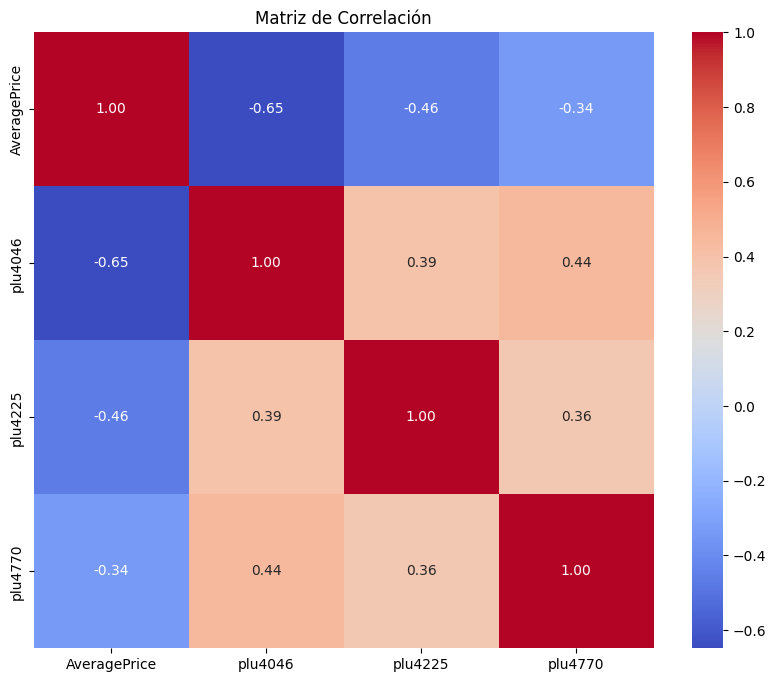

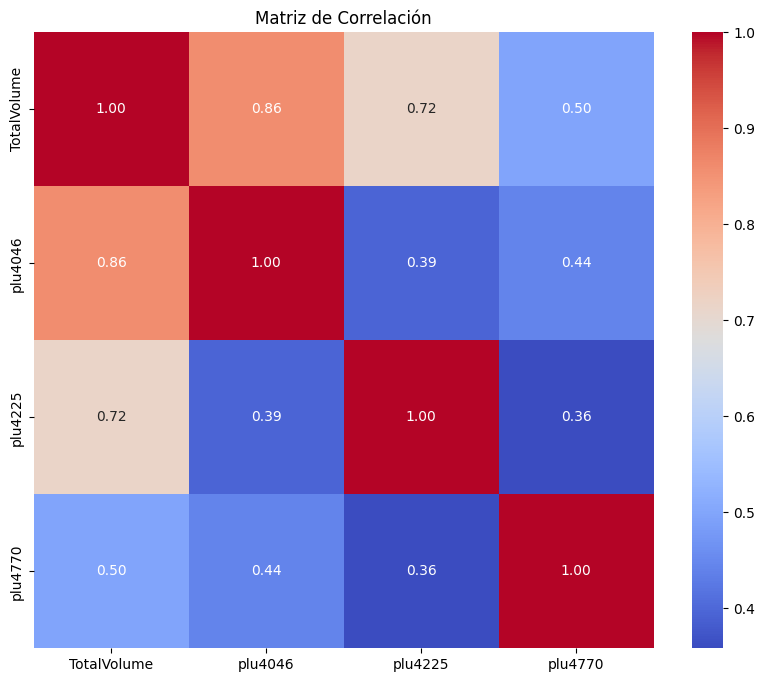

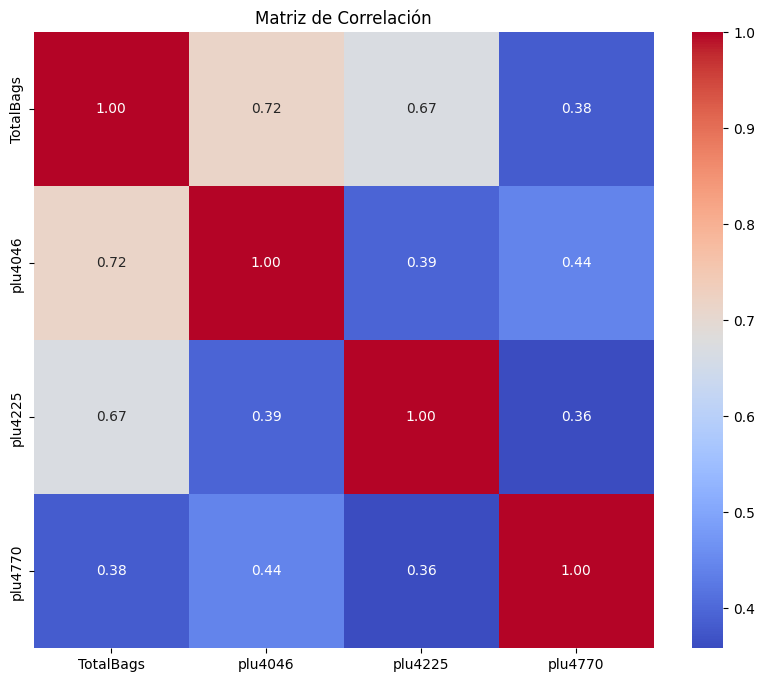

In [3]:
"""
5.1. Matriz de Correlación:

Uso de Datos: Utiliza las columnas numéricas del DataFrame (p. ej., AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags).
Esperado:
Importa las librerías necesarias: import seaborn as sns y import matplotlib.pyplot as plt.
Calcula la matriz de correlación usando el método .corr() del DataFrame.
Visualiza la matriz utilizando sns.heatmap().
Anota las correlaciones más significativas y discute su posible impacto en el análisis.
"""
# 5.1 Matriz de Correlación

# Select the numerical columns for correlation analysis
numerical_cols = ['AveragePrice', 'TotalVolume', 'TotalBags']

#for df2 in [ df_reduced, df_cities, df_regions ]:
for df2 in [ df_reduced ]:
    for cor in numerical_cols:
        # '4046', '4225', '4770',
        my_cols = [ cor, 'plu4046', 'plu4225', 'plu4770']
        df_corr = df2[my_cols]

        # Calculate the correlation matrix
        correlation_matrix = df_corr.corr()

        # Visualize the correlation matrix using a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Matriz de Correlación')
        plt.show()

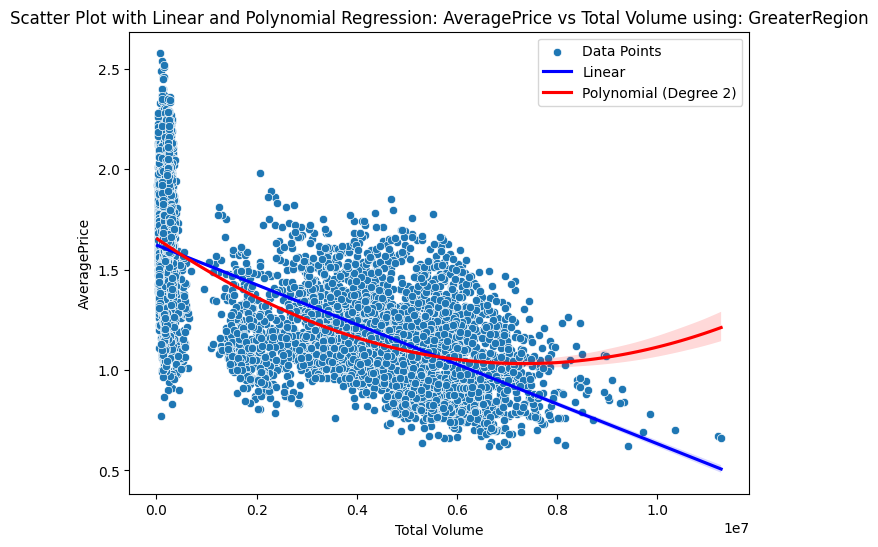

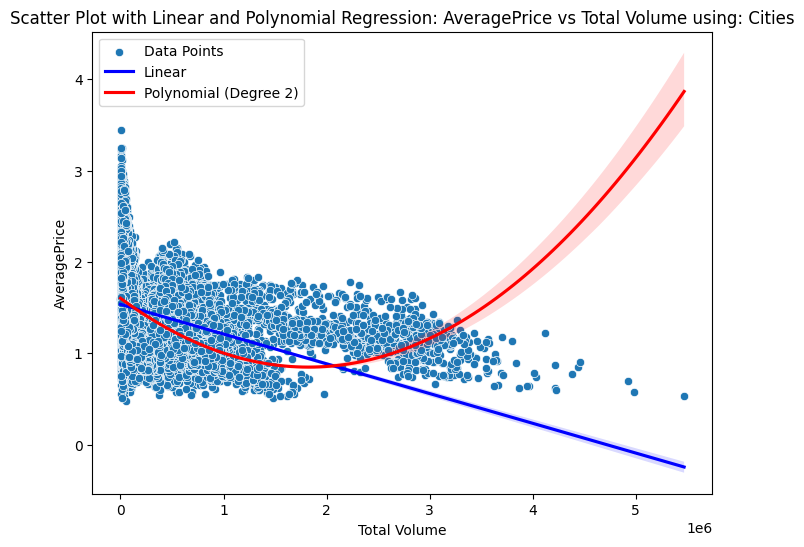

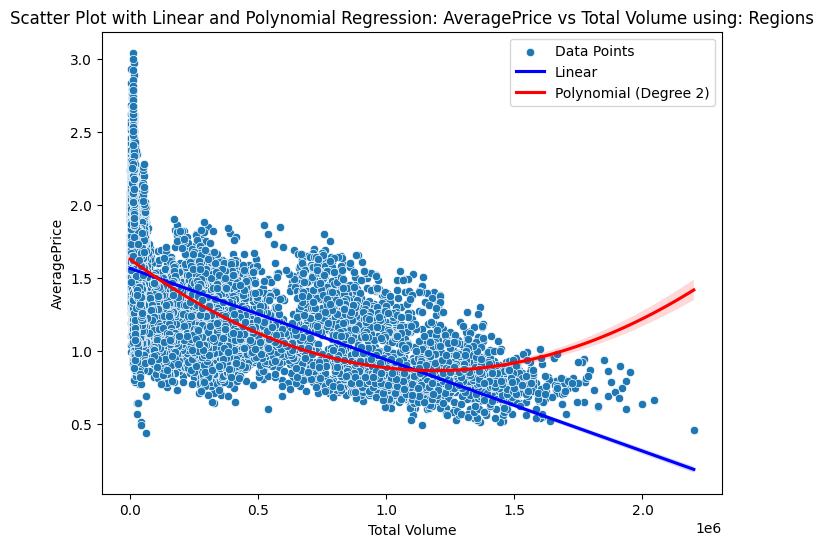

In [4]:
"""
5.2. Análisis de Dispersión entre Variables Clave:

Uso de Datos: Selecciona variables numéricas de interés como AveragePrice y Total Volume.
Esperado:
Importa las librerías necesarias: import seaborn as sns y import matplotlib.pyplot as plt.
Crea un gráfico de dispersión con sns.scatterplot() para visualizar la relación entre AveragePrice y Total Volume.
Añade una línea de regresión utilizando sns.regplot() para ilustrar las tendencias.
Compara el ajuste de una regresión lineal frente a una polinómica.
"""
# 5.2 Análisis de Dispersión entre Variables Clave

# Create a scatter plot
i = 0;
title = [ "GreaterRegion", "Cities", "Regions" ]
for df2 in [ df_reduced, df_cities, df_regions ]:

    # Initialize the plot
    plt.figure(figsize=(8, 6))

    # Scatter plot with title
    sns.scatterplot(x='TotalVolume', y='AveragePrice', data=df2, label='Data Points')

    # Add a linear regression line
    sns.regplot(x='TotalVolume', y='AveragePrice', data=df2, scatter=False, label='Linear', color='blue')

    # Add a polynomial regression line (degree=2)
    sns.regplot(x='TotalVolume', y='AveragePrice', data=df2, scatter=False, order=2, label='Polynomial (Degree 2)', color='red')

    # Customize the plot
    plt.title(f'Scatter Plot with Linear and Polynomial Regression: AveragePrice vs Total Volume using: {title[i]}')
    plt.xlabel('Total Volume')
    plt.ylabel('AveragePrice')
    plt.legend()
    plt.show()
    i += 1


Dataset: Reduced Data
R²: -0.11591095154093667
RMSE: 0.20256499638502923




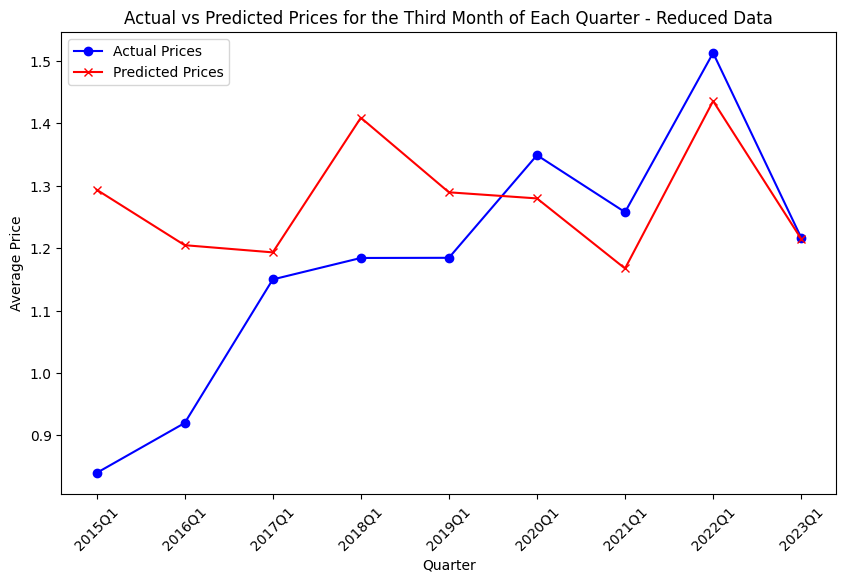

Dataset: Cities Data
R²: -3.474232607696333
RMSE: 0.2923655204635462




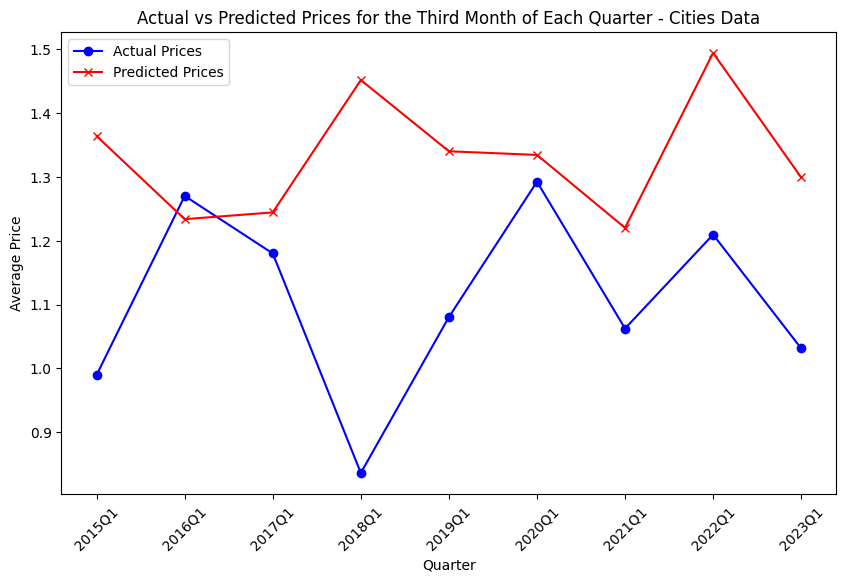

Dataset: Regions Data
R²: -0.05413421392484663
RMSE: 0.11269045707017608




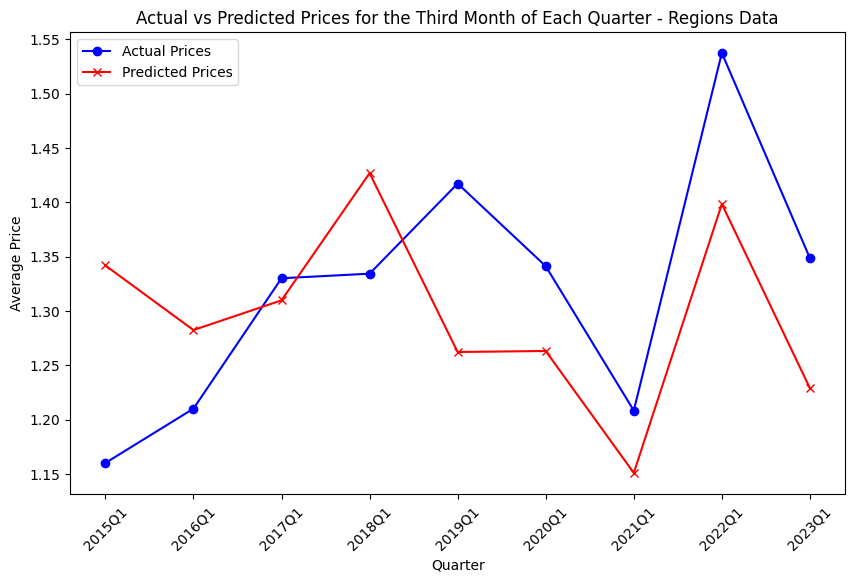

In [5]:
"""
5.3. Predicciones Mensuales Usando Datos Trimestrales:

Uso de Datos: Agrupa datos por trimestres y segmenta en meses utilizando Date, AveragePrice, y Total Volume.
Esperado:
Convierte la columna Date a tipo datetime si es necesario.
Agrupa los datos por trimestre y calcula el promedio de AveragePrice y Total Volume.
Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
Compara los resultados de las predicciones con los precios reales.
Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.
"""
# 5.3 Predicciones Mensuales Usando Datos Trimestrales
from sklearn.metrics import r2_score, mean_squared_error

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Loop over each dataset
for idx, data in enumerate(dataframes):
    
    # Create a column for the quarter and month
    data['Quarter'] = data['Date'].dt.to_period('Q')
    data['Month'] = data['Date'].dt.month
    
    # Group data by quarter and calculate the average of 'AveragePrice' and 'Total Volume'
    quarterly_data = data.groupby('Quarter').agg({
        'AveragePrice': 'mean',
        'TotalVolume': 'mean'
    }).reset_index()
    
    # Initialize lists to store predictions and actual values
    predicted_prices = []
    actual_prices = []
    quarters = []

    # Loop through each quarter to make predictions
    for quarter in data['Quarter'].unique():
        # Filter data for the current quarter
        quarter_data = data[data['Quarter'] == quarter]
        
        # Separate the first two months and third month of the quarter
        first_two_months = quarter_data[quarter_data['Month'] <= 2]
        third_month = quarter_data[quarter_data['Month'] == 3]
        
        # Check if we have enough data for the prediction
        if len(first_two_months) >= 2 and not third_month.empty:
            # Calculate the average price for the first two months
            avg_price_first_two = first_two_months['AveragePrice'].mean()
            
            # Use this as the predicted price for the third month
            predicted_price = avg_price_first_two
            predicted_prices.append(predicted_price)
            
            # Store the actual price for the third month
            actual_price = third_month['AveragePrice'].values[0]
            actual_prices.append(actual_price)
            
            # Store the quarter for labeling
            quarters.append(str(quarter))
    
    # Convert to numpy arrays for evaluation
    predicted_prices = np.array(predicted_prices)
    actual_prices = np.array(actual_prices)
    
    # Evaluate prediction accuracy using R² and RMSE
    r2 = r2_score(actual_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
    
    print(f"Dataset: {titles[idx]}")
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}")
    print("\n")

    # Plot the actual vs predicted prices
    plt.figure(figsize=(10, 6))
    plt.plot(quarters, actual_prices, label='Actual Prices', marker='o', color='b')
    plt.plot(quarters, predicted_prices, label='Predicted Prices', marker='x', color='r')

    # Add titles and labels
    plt.title(f"Actual vs Predicted Prices for the Third Month of Each Quarter - {titles[idx]}")
    plt.xlabel('Quarter')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend()

    # Display the plot
    plt.show()


Dataset: Reduced Data
R²: 0.20809765317998064
RMSE: 0.17064180869834947



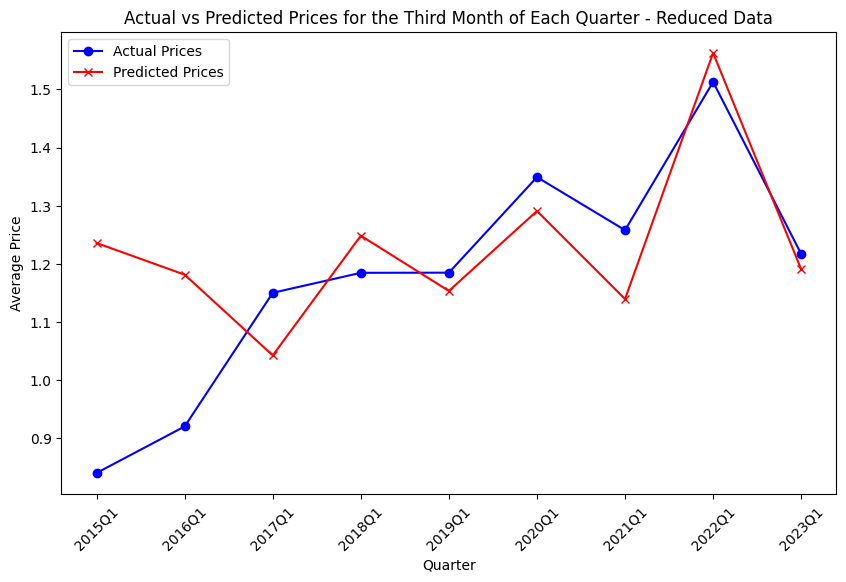

Dataset: Cities Data
R²: -2.970216300737363
RMSE: 0.27540635567650407



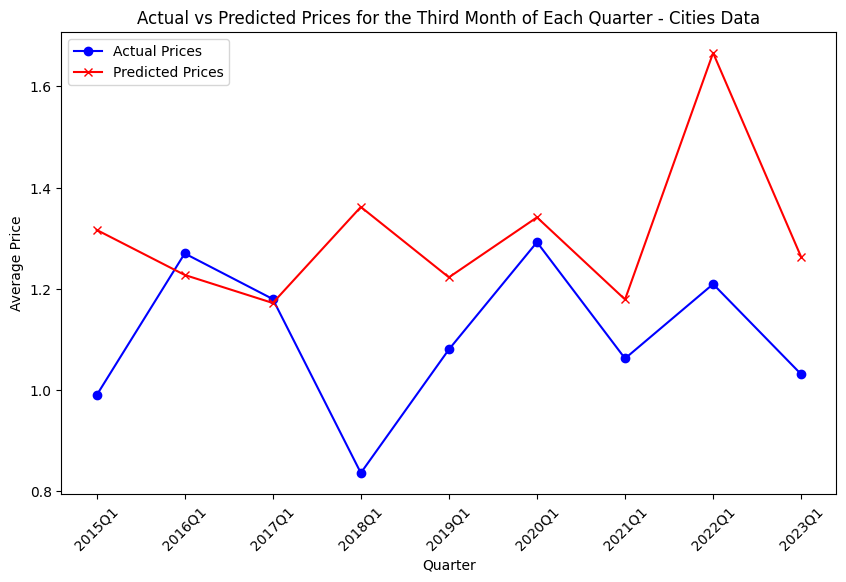

Dataset: Regions Data
R²: -0.3312283101550355
RMSE: 0.12663841261287342



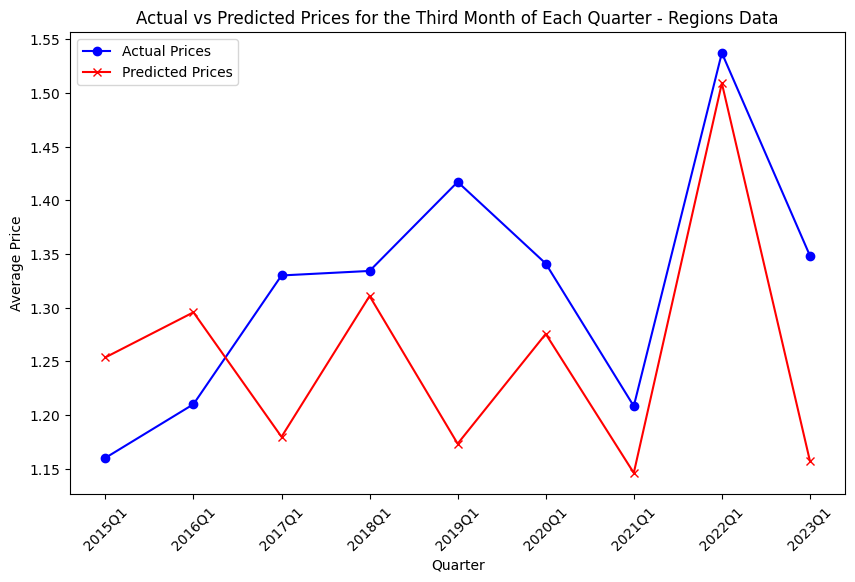

In [6]:
"""
5.3 Predicciones Mensuales Usando Datos Trimestrales:

Uso de Datos: Agrupa datos por trimestres y segmenta en meses utilizando Date, AveragePrice, y Total Volume.
Esperado:
Convierte la columna Date a tipo datetime si es necesario.
Agrupa los datos por trimestre y calcula el promedio de AveragePrice y Total Volume.
Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
Compara los resultados de las predicciones con los precios reales.
Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

Suggestion from chatGPT to encrease R2 (squared)
Smooth Out Noise with Moving Averages
A moving average can help smooth out noise and emphasize underlying trends. 
You could try using a rolling average of AveragePrice over the previous months to predict the current month’s price.

Example: Using Linear Regression to Predict the Third Month
Here's how you could adapt your code to use a simple linear regression model. 
This model will use data from both the first and second months to predict the third month in each quarter.
"""
# 5.3 Predicciones Mensuales Usando Datos Trimestrales
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]
# Loop over each dataset
for idx, data in enumerate(dataframes):
    data['Quarter'] = data['Date'].dt.to_period('Q')
    data['Month'] = data['Date'].dt.month

    # Initialize lists for storing predictions and actual values
    predicted_prices = []
    actual_prices = []
    quarters = []

    for quarter in data['Quarter'].unique():
        # Filter data for the current quarter
        quarter_data = data[data['Quarter'] == quarter]

        # Separate the first two months and third month of the quarter
        first_two_months = quarter_data[quarter_data['Month'] <= 2]
        third_month = quarter_data[quarter_data['Month'] == 3]

        # Ensure we have enough data
        if len(first_two_months) >= 2 and not third_month.empty:
            # Prepare training data (first two months)
            X_train = np.array(first_two_months['Month']).reshape(-1, 1)
            y_train = first_two_months['AveragePrice'].values

            # Train a linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Predict the third month using the trained model
            predicted_price = model.predict([[3]])[0]
            predicted_prices.append(predicted_price)

            # Store the actual price for the third month
            actual_price = third_month['AveragePrice'].values[0]
            actual_prices.append(actual_price)
            quarters.append(str(quarter))

    # Convert to numpy arrays for evaluation
    predicted_prices = np.array(predicted_prices)
    actual_prices = np.array(actual_prices)

    # Calculate evaluation metrics
    r2 = r2_score(actual_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

    print(f"Dataset: {titles[idx]}")
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}\n")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(quarters, actual_prices, label='Actual Prices', marker='o', color='b')
    plt.plot(quarters, predicted_prices, label='Predicted Prices', marker='x', color='r')
    plt.title(f"Actual vs Predicted Prices for the Third Month of Each Quarter - {titles[idx]}")
    plt.xlabel('Quarter')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

Dataset: Reduced Data
R²: -0.1880963365733579
RMSE: 0.14912182841759833



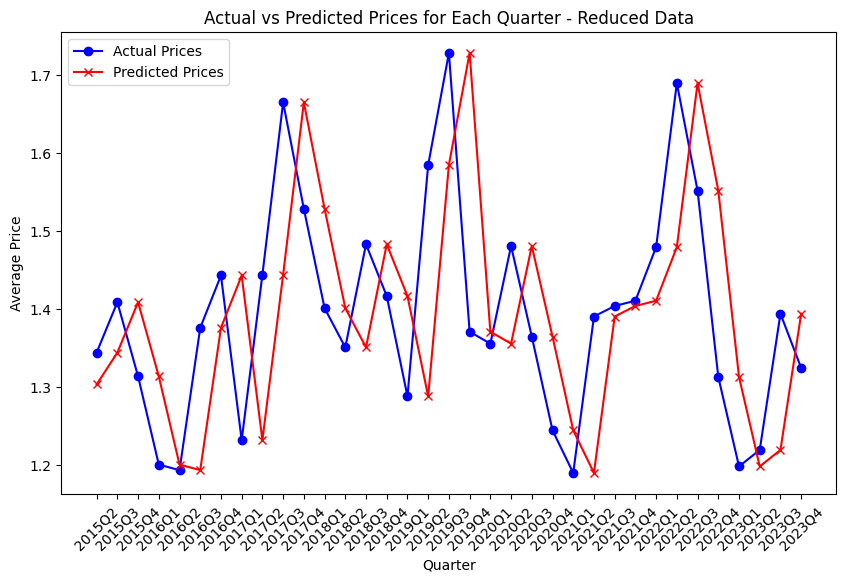

Dataset: Cities Data
R²: -0.15743060364889438
RMSE: 0.1491113171654995



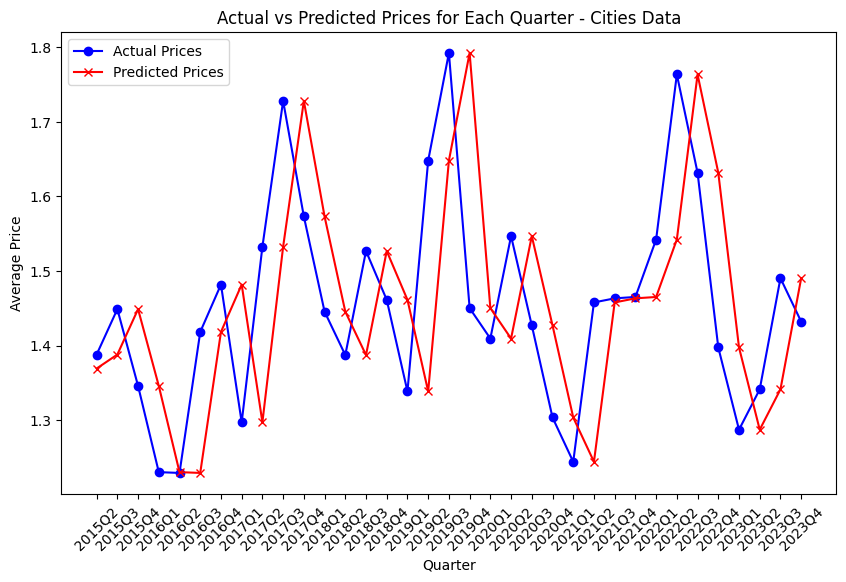

Dataset: Regions Data
R²: -0.15404401351785157
RMSE: 0.12790443447143737



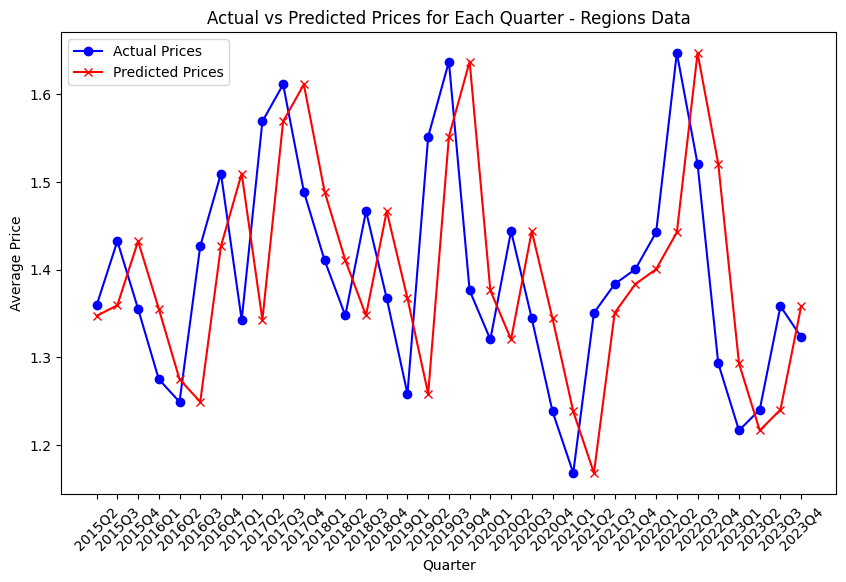

In [7]:
"""
5.4. Uso de Datos: Agrupa los datos en trimestres usando solo variables numéricas.
Esperado:
Agrupa los datos por trimestres usando pd.Grouper() con freq='Q' para obtener promedios.
Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
Compara los resultados de las predicciones con los precios reales.
Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.
Predicciones Anuales:
"""
# 5.4 Predicciones  Trimestrales

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Loop over each dataset
for idx, data in enumerate(dataframes):
    # Convert Date to datetime and create a column for Quarter
    data['Quarter'] = data['Date'].dt.to_period('Q')

    # Group data by quarter and calculate the average for 'AveragePrice' and 'Total Volume'
    quarterly_data = data.groupby('Quarter').agg({
        'AveragePrice': 'mean',
        'TotalVolume': 'mean'
    }).reset_index()

    # Initialize lists for storing predictions and actual values
    predicted_prices = []
    actual_prices = []
    quarters = []

    # Loop through each quarter, using previous quarters to predict the next quarter
    for i in range(len(quarterly_data) - 1):
        # Define the current quarter as the target to predict
        current_quarter = quarterly_data.iloc[i]
        next_quarter = quarterly_data.iloc[i + 1]

        # Prepare training data (average price of current quarter to predict next)
        X_train = np.array([[i]])
        y_train = current_quarter['AveragePrice']

        # Predict the next quarter's price
        model = LinearRegression()
        model.fit(X_train, [y_train])
        predicted_price = model.predict([[i + 1]])[0]
        predicted_prices.append(predicted_price)

        # Store the actual price for the next quarter
        actual_price = next_quarter['AveragePrice']
        actual_prices.append(actual_price)

        # Save the quarter label for plotting
        quarters.append(str(next_quarter['Quarter']))

    # Convert to numpy arrays for evaluation
    predicted_prices = np.array(predicted_prices)
    actual_prices = np.array(actual_prices)

    # Calculate evaluation metrics
    r2 = r2_score(actual_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

    print(f"Dataset: {titles[idx]}")
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}\n")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(quarters, actual_prices, label='Actual Prices', marker='o', color='b')
    plt.plot(quarters, predicted_prices, label='Predicted Prices', marker='x', color='r')
    plt.title(f"Actual vs Predicted Prices for Each Quarter - {titles[idx]}")
    plt.xlabel('Quarter')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


Dataset: Reduced Data
R²: -1.5089908025266512
RMSE: 0.1287498096987724



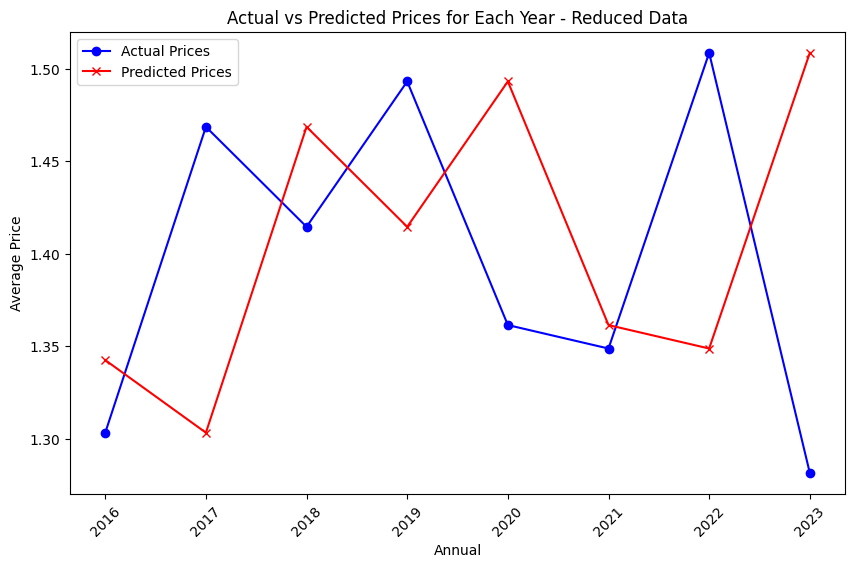

Dataset: Cities Data
R²: -1.6609024577146223
RMSE: 0.13450248175691115



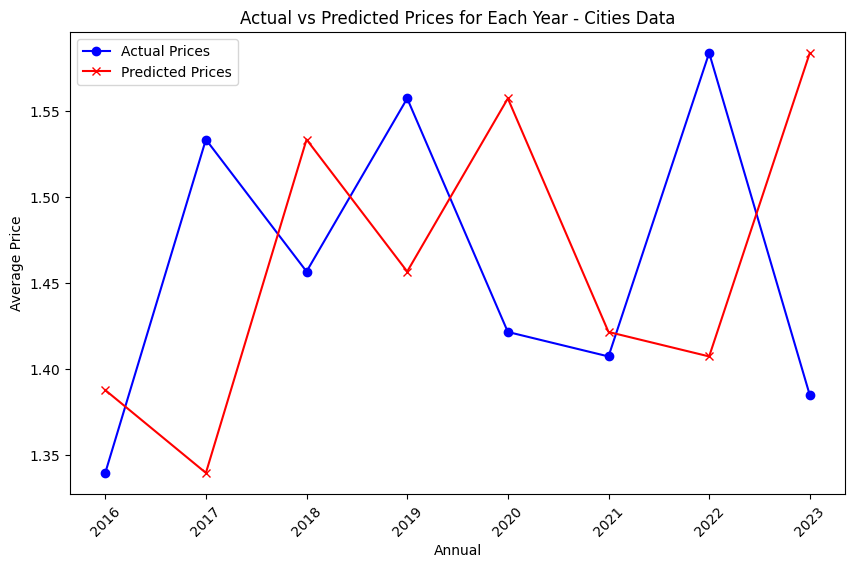

Dataset: Regions Data
R²: -1.4587370398032111
RMSE: 0.11571782895845656



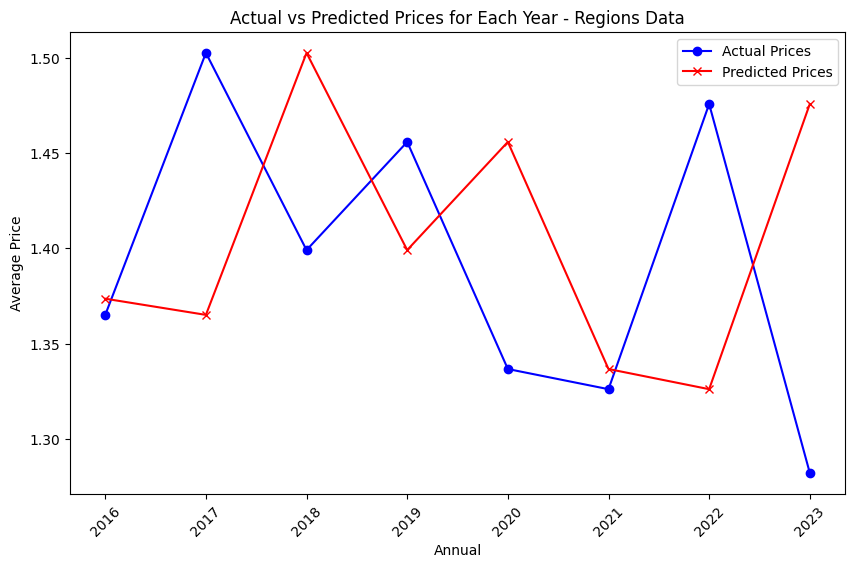

In [8]:
"""
5.5. Uso de Datos: Agrupa los datos en años, utilizando únicamente columnas numéricas.
Esperado:
Agrupa los datos por año utilizando pd.Grouper() con freq='Y'.
Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.
"""
# 5.5 Uso de Datos: Agrupa los datos en años, utilizando únicamente columnas numéricas
#

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Loop over each dataset
for idx, data in enumerate(dataframes):
    # Convert Date to datetime and create a column for Quarter
    data['Annual'] = data['Date'].dt.to_period('Y')

    # Group data by quarter and calculate the average for 'AveragePrice' and 'Total Volume'
    quarterly_data = data.groupby('Annual').agg({
        'AveragePrice': 'mean',
        'TotalVolume': 'mean'
    }).reset_index()

    # Initialize lists for storing predictions and actual values
    predicted_prices = []
    actual_prices = []
    quarters = []

    # Loop through each quarter, using previous quarters to predict the next quarter
    for i in range(len(quarterly_data) - 1):
        # Define the current quarter as the target to predict
        current_quarter = quarterly_data.iloc[i]
        next_quarter = quarterly_data.iloc[i + 1]

        # Prepare training data (average price of current quarter to predict next)
        X_train = np.array([[i]])
        y_train = current_quarter['AveragePrice']

        # Predict the next quarter's price
        model = LinearRegression()
        model.fit(X_train, [y_train])
        predicted_price = model.predict([[i + 1]])[0]
        predicted_prices.append(predicted_price)

        # Store the actual price for the next quarter
        actual_price = next_quarter['AveragePrice']
        actual_prices.append(actual_price)

        # Save the quarter label for plotting
        quarters.append(str(next_quarter['Annual']))

    # Convert to numpy arrays for evaluation
    predicted_prices = np.array(predicted_prices)
    actual_prices = np.array(actual_prices)

    # Calculate evaluation metrics
    r2 = r2_score(actual_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

    print(f"Dataset: {titles[idx]}")
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}\n")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(quarters, actual_prices, label='Actual Prices', marker='o', color='b')
    plt.plot(quarters, predicted_prices, label='Predicted Prices', marker='x', color='r')
    plt.title(f"Actual vs Predicted Prices for Each Year - {titles[idx]}")
    plt.xlabel('Annual')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()



Dataset: Reduced Data
R²: 0.5156661312950217
RMSE: 0.24141815450052972


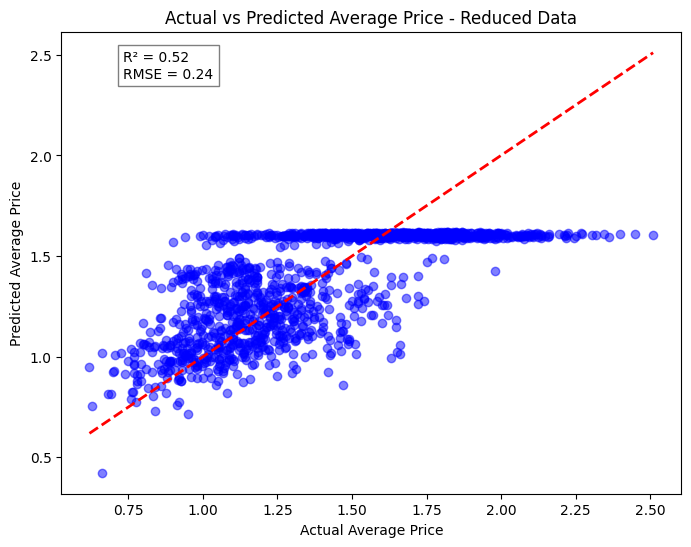


Dataset: Cities Data
R²: 0.14331865750926476
RMSE: 0.3706843051838117


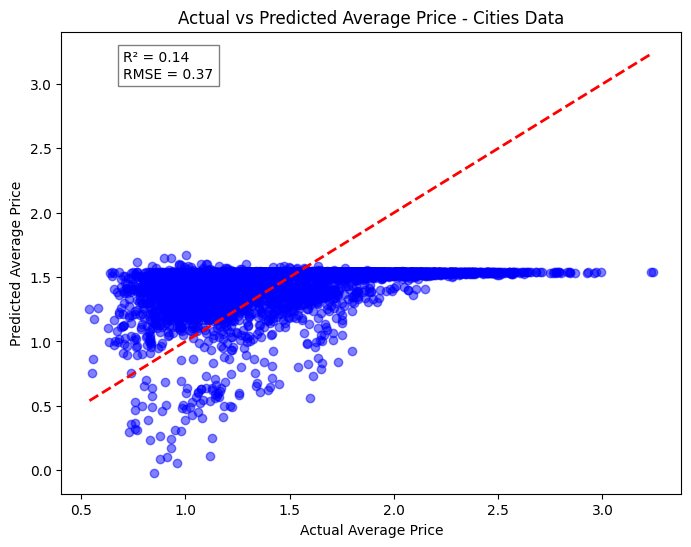


Dataset: Regions Data
R²: 0.3871417076867224
RMSE: 0.3078618869669181


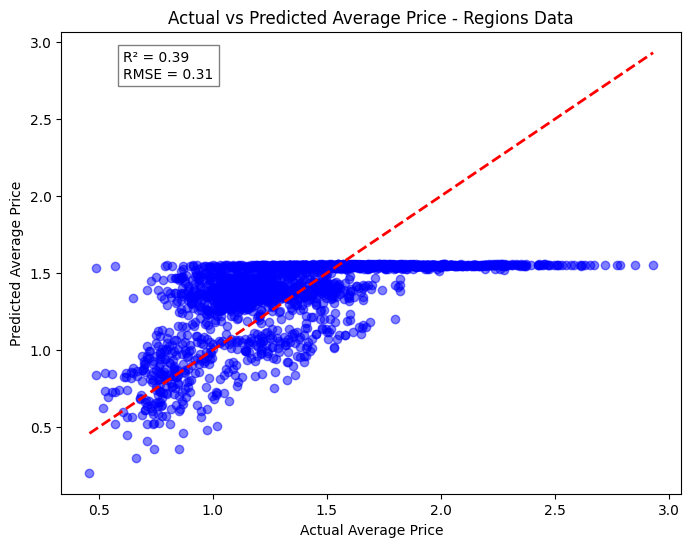

In [9]:
#5.6 Desarrollo de Modelos de Regresión Múltiple
"""
Desarrollo de Modelos de Regresión Múltiple:

Uso de Datos: Selecciona varias variables numéricas como Total Volume, 4046, 4225, 4770, y Total Bags para predecir AveragePrice.
Esperado:
Define las variables independientes (X) y dependientes (y).
Ajusta modelos de regresión múltiple.
Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.
"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Loop over each dataset
for idx, data in enumerate(dataframes):
    # Define independent (X) and dependent (y) variables
    X = data[['TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags']]
    y = data['AveragePrice']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and fit the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print results
    print(f"\nDataset: {titles[idx]}")
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}")

    # Plot Actual vs. Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line y=x
    plt.title(f'Actual vs Predicted Average Price - {titles[idx]}')
    plt.xlabel('Actual Average Price')
    plt.ylabel('Predicted Average Price')
    plt.text(0.1, 0.9, f'R² = {r2:.2f}\nRMSE = {rmse:.2f}', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.5))
    plt.show()


In [10]:
# 5.7 Análisis de Coeficientes de Regresión Múltiple
"""
Análisis de Coeficientes de Regresión Múltiple:

Uso de Datos: Examina los coeficientes de los modelos de regresión múltiple ajustados.
Esperado:
Extrae los coeficientes del modelo ajustado.
Interpreta los coeficientes para entender el impacto de cada variable numérica en AveragePrice.
Comenta sobre las variables más significativas y su relevancia.
"""
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Loop over each dataset
for idx, data in enumerate(dataframes):
    # Define independent (X) and dependent (y) variables
    X = data[['TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags']]
    y = data['AveragePrice']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and fit the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Extract coefficients
    coefficients = model.coef_
    feature_names = X.columns
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    
    # Print results
    print(f"\nDataset: {titles[idx]}")
    print("Regression Coefficients:")
    print(coef_df)
    print(f"Intercept: {model.intercept_:.4f}")


Dataset: Reduced Data
Regression Coefficients:
       Feature   Coefficient
0  TotalVolume -6.887688e-08
1      plu4046 -5.822788e-08
2      plu4225  8.058127e-10
3      plu4770  4.722903e-08
4    TotalBags -4.243508e-08
Intercept: 1.6199

Dataset: Cities Data
Regression Coefficients:
       Feature   Coefficient
0  TotalVolume -2.677694e-07
1      plu4046 -3.515773e-07
2      plu4225  9.405571e-08
3      plu4770  1.554690e-06
4    TotalBags -1.250636e-07
Intercept: 1.5414

Dataset: Regions Data
Regression Coefficients:
       Feature   Coefficient
0  TotalVolume -6.125587e-07
1      plu4046 -5.859205e-08
2      plu4225  9.787302e-08
3      plu4770 -1.614223e-06
4    TotalBags  9.547252e-08
Intercept: 1.5578



Dataset: Reduced Data
Linear Regression - R²: 0.5150, RMSE: 0.2416
Polynomial Regression (Degree 2) - R²: 0.5590, RMSE: 0.2304


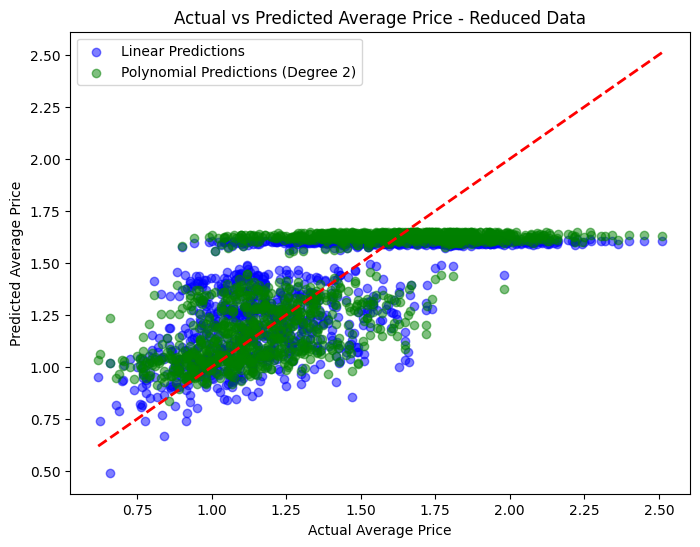


Dataset: Cities Data
Linear Regression - R²: 0.1432, RMSE: 0.3707
Polynomial Regression (Degree 2) - R²: 0.2481, RMSE: 0.3473


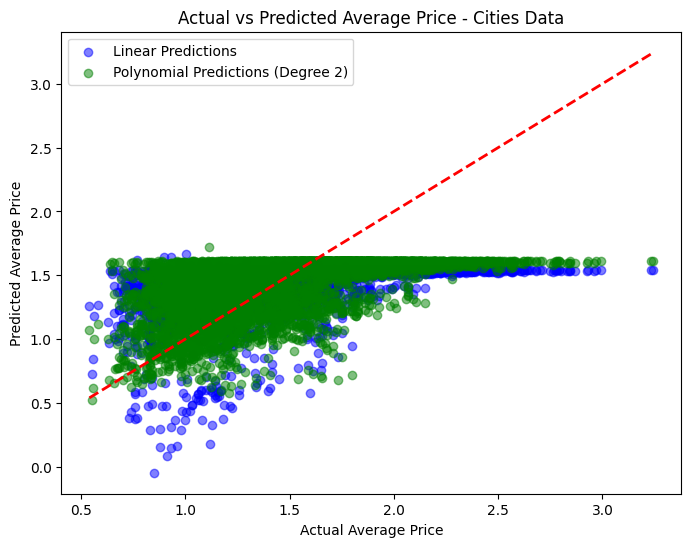


Dataset: Regions Data
Linear Regression - R²: 0.3868, RMSE: 0.3079
Polynomial Regression (Degree 2) - R²: 0.4849, RMSE: 0.2822


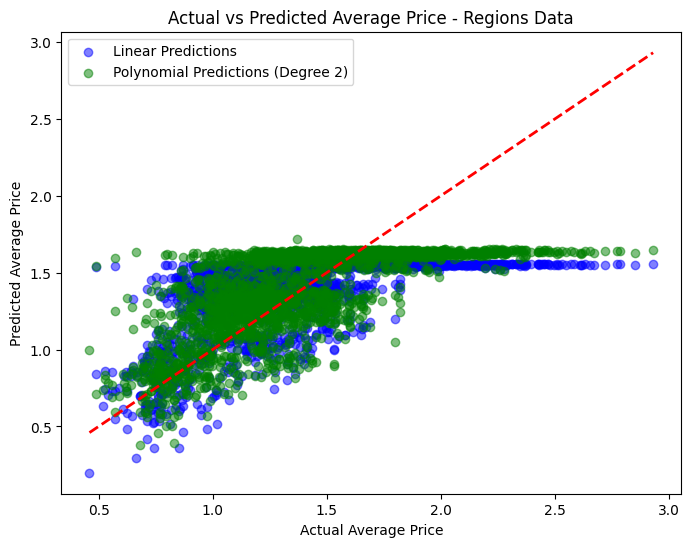

In [11]:
# 5.8 Modelos de Regresión para Diferenciar Volúmenes de Ventas
"""
Modelos de Regresión para Diferenciar Volúmenes de Ventas:

Uso de Datos: Usa AveragePrice, Total Volume, 4046, 4225, y 4770.
Esperado:
Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan AveragePrice.
Compara los resultados de regresión lineal y polinómica.
Presenta las conclusiones de tus análisis.
"""
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Define the features and target
features = ['TotalVolume', 'plu4046', 'plu4225', 'plu4770']
target = 'AveragePrice'

# Degree of polynomial for polynomial regression
poly_degree = 2

# Loop over each dataset
for idx, data in enumerate(dataframes):
    print(f"\nDataset: {titles[idx]}")
    
    # Define independent (X) and dependent (y) variables
    X = data[features]
    y = data[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    r2_linear = r2_score(y_test, y_pred_linear)
    rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
    print(f"Linear Regression - R²: {r2_linear:.4f}, RMSE: {rmse_linear:.4f}")
    
    # Polynomial Regression
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    print(f"Polynomial Regression (Degree {poly_degree}) - R²: {r2_poly:.4f}, RMSE: {rmse_poly:.4f}")
    
    # Comparison Plot: Linear vs Polynomial Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_linear, label="Linear Predictions", alpha=0.5, color="blue")
    plt.scatter(y_test, y_pred_poly, label=f"Polynomial Predictions (Degree {poly_degree})", alpha=0.5, color="green")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    plt.title(f"Actual vs Predicted Average Price - {titles[idx]}")
    plt.xlabel("Actual Average Price")
    plt.ylabel("Predicted Average Price")
    plt.legend()
    plt.show()


Dataset: Reduced Data
Linear Regression Coefficients:
TotalVolume: -0.0000
TotalBags: -0.0000
Intercept: 1.6217
Linear Regression - R²: 0.5047, RMSE: 0.2441
Polynomial Regression (Degree 2) - R²: 0.5282, RMSE: 0.2383


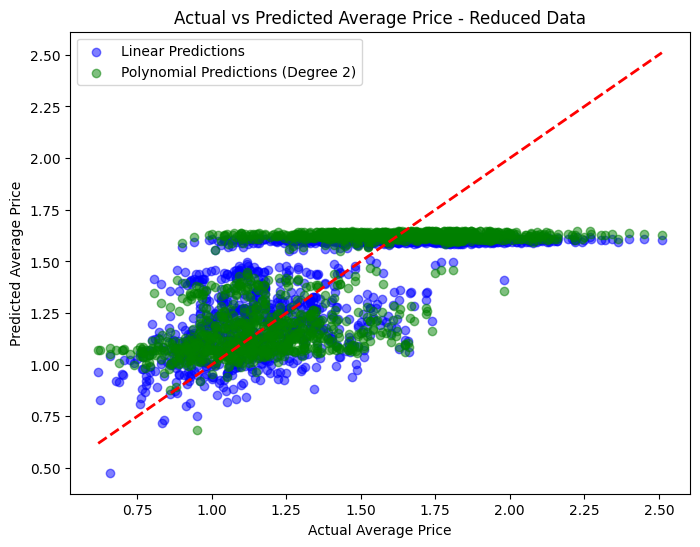


Dataset: Cities Data
Linear Regression Coefficients:
TotalVolume: -0.0000
TotalBags: -0.0000
Intercept: 1.5385
Linear Regression - R²: 0.1283, RMSE: 0.3739
Polynomial Regression (Degree 2) - R²: 0.2194, RMSE: 0.3538


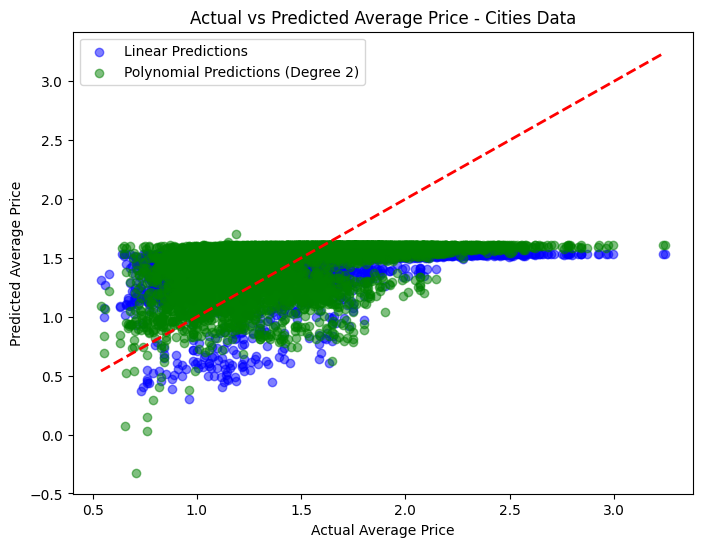


Dataset: Regions Data
Linear Regression Coefficients:
TotalVolume: -0.0000
TotalBags: 0.0000
Intercept: 1.5600
Linear Regression - R²: 0.3836, RMSE: 0.3087
Polynomial Regression (Degree 2) - R²: 0.4372, RMSE: 0.2950


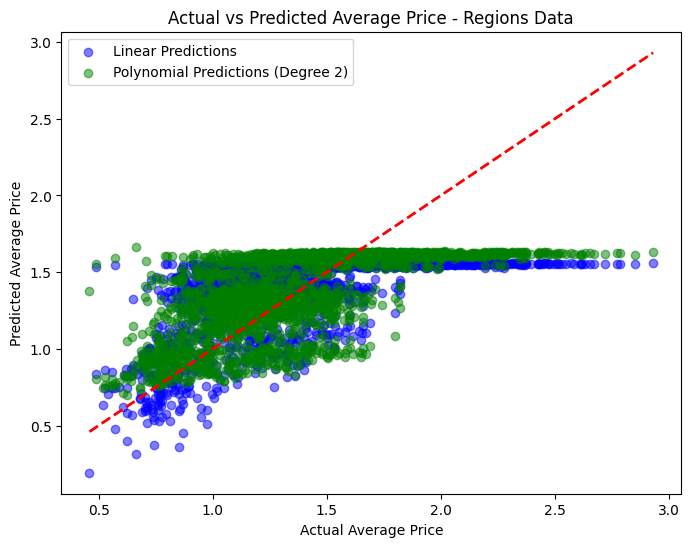

In [12]:
# 5.9.Análisis de la Influencia de las Ventas Totales en el Precio Promedio
"""
Análisis de la Influencia de las Ventas Totales en el Precio Promedio:

Uso de Datos: Usa Total Volume, AveragePrice, y Total Bags.
Esperado:
Ajusta un modelo de regresión lineal y polinómica para ver cómo varía AveragePrice en función del volumen total de ventas.
Evalúa la significancia de los coeficientes y discute su relevancia.
"""
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Define the features and target
features = ['TotalVolume', 'TotalBags']
target = 'AveragePrice'

# Degree of polynomial for polynomial regression
poly_degree = 2

# Loop over each dataset
for idx, data in enumerate(dataframes):
    print(f"\nDataset: {titles[idx]}")
    
    # Define independent (X) and dependent (y) variables
    X = data[features]
    y = data[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    r2_linear = r2_score(y_test, y_pred_linear)
    rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
    
    # Print Linear Model Coefficients
    print("Linear Regression Coefficients:")
    for feature, coef in zip(features, linear_model.coef_):
        print(f"{feature}: {coef:.4f}")
    print(f"Intercept: {linear_model.intercept_:.4f}")
    print(f"Linear Regression - R²: {r2_linear:.4f}, RMSE: {rmse_linear:.4f}")
    
    # Polynomial Regression
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    
    print(f"Polynomial Regression (Degree {poly_degree}) - R²: {r2_poly:.4f}, RMSE: {rmse_poly:.4f}")
    
    # Comparison Plot: Linear vs Polynomial Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_linear, label="Linear Predictions", alpha=0.5, color="blue")
    plt.scatter(y_test, y_pred_poly, label=f"Polynomial Predictions (Degree {poly_degree})", alpha=0.5, color="green")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    plt.title(f"Actual vs Predicted Average Price - {titles[idx]}")
    plt.xlabel("Actual Average Price")
    plt.ylabel("Predicted Average Price")
    plt.legend()
    plt.show()



Dataset: Reduced Data
Linear Regression - R²: 0.5150, RMSE: 0.2416
Polynomial Regression (Degree 2) - R²: 0.5590, RMSE: 0.2304


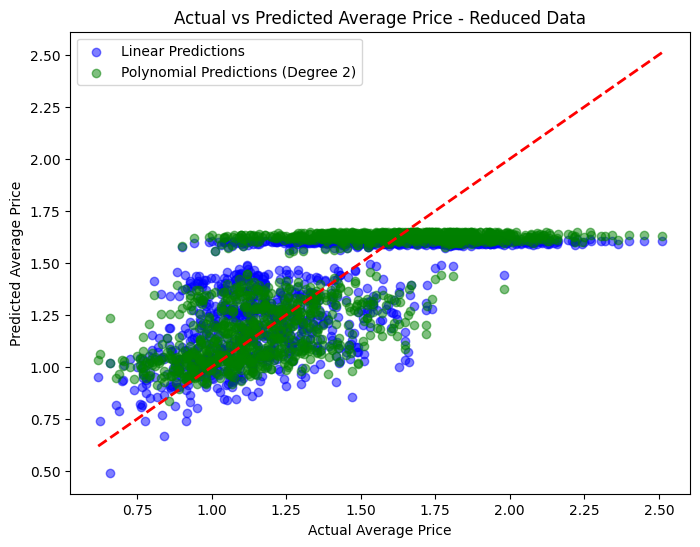


Dataset: Cities Data
Linear Regression - R²: 0.1432, RMSE: 0.3707
Polynomial Regression (Degree 2) - R²: 0.2481, RMSE: 0.3473


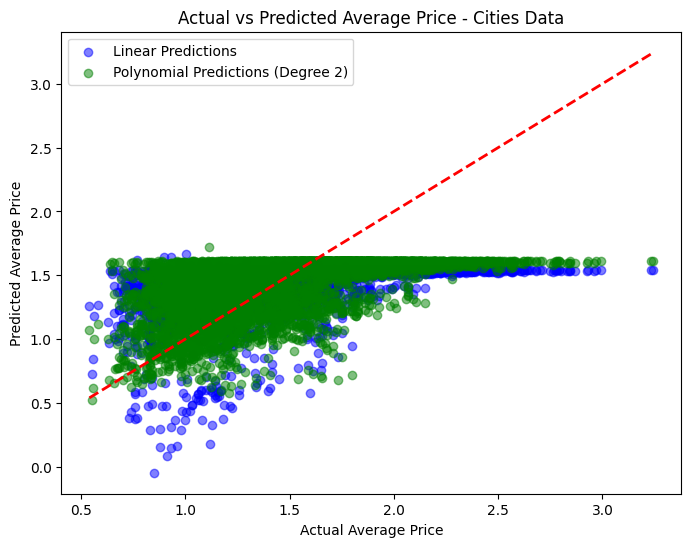


Dataset: Regions Data
Linear Regression - R²: 0.3868, RMSE: 0.3079
Polynomial Regression (Degree 2) - R²: 0.4849, RMSE: 0.2822


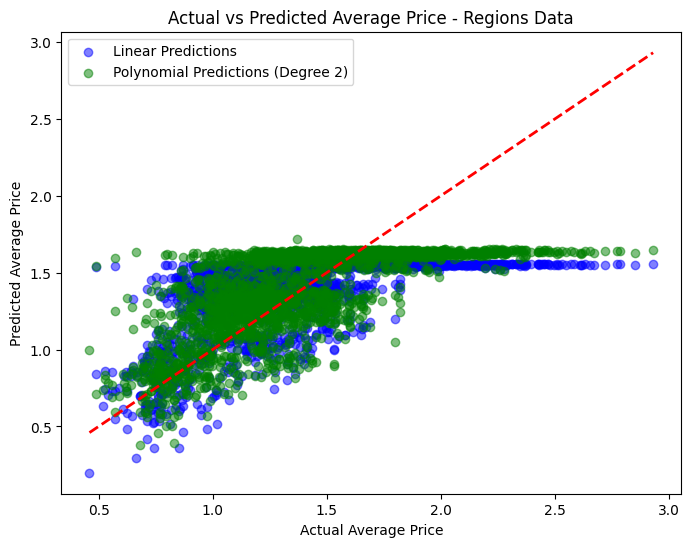

In [13]:
# 5.10. Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo
"""
Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:

Uso de Datos: Usa AveragePrice, 4046, 4225, 4770, y Total Volume.
Esperado:
Ajusta modelos de regresión lineal y polinómica.
Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.
"""
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Define the features and target
features = ['plu4046', 'plu4225', 'plu4770', 'TotalVolume']
target = 'AveragePrice'

# Degree of polynomial for polynomial regression
poly_degree = 2

# Loop over each dataset
for idx, data in enumerate(dataframes):
    print(f"\nDataset: {titles[idx]}")
    
    # Define independent (X) and dependent (y) variables
    X = data[features]
    y = data[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    r2_linear = r2_score(y_test, y_pred_linear)
    rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
    print(f"Linear Regression - R²: {r2_linear:.4f}, RMSE: {rmse_linear:.4f}")
    
    # Polynomial Regression
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    print(f"Polynomial Regression (Degree {poly_degree}) - R²: {r2_poly:.4f}, RMSE: {rmse_poly:.4f}")
    
    # Comparison Plot: Linear vs Polynomial Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_linear, label="Linear Predictions", alpha=0.5, color="blue")
    plt.scatter(y_test, y_pred_poly, label=f"Polynomial Predictions (Degree {poly_degree})", alpha=0.5, color="green")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    plt.title(f"Actual vs Predicted Average Price - {titles[idx]}")
    plt.xlabel("Actual Average Price")
    plt.ylabel("Predicted Average Price")
    plt.legend()
    plt.show()


In [14]:
# 5.10bis - usando comparativa r2 test y r2 train
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Polynomial degree (can adjust based on performance)
poly_degree = 2

# Initialize models
linear_model = LinearRegression()
poly = PolynomialFeatures(degree=poly_degree)
poly_model = LinearRegression()

# Datasets to evaluate
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Features and target
features = ['plu4046', 'plu4225', 'plu4770', 'TotalVolume']
target = 'AveragePrice'

# Initialize list to store results
results = []

# Loop over each dataset
for idx, data in enumerate(dataframes):
    print(f"\nDataset: {titles[idx]}")
    
    # Define X and y
    X = data[features]
    y = data[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression
    linear_model.fit(X_train, y_train)
    y_train_pred_linear = linear_model.predict(X_train)
    y_test_pred_linear = linear_model.predict(X_test)
    
    # Calculate metrics for Linear Regression
    r2_train_linear = r2_score(y_train, y_train_pred_linear)
    r2_test_linear = r2_score(y_test, y_test_pred_linear)
    mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
    mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)
    rmse_train_linear = np.sqrt(mse_train_linear)
    rmse_test_linear = np.sqrt(mse_test_linear)
    
    # Store results for linear model
    results.append({
        "Dataset": titles[idx],
        "Model": "Linear",
        "R² Train": r2_train_linear,
        "R² Test": r2_test_linear,
        "R² Gap": abs(r2_train_linear - r2_test_linear),
        "RMSE Train": rmse_train_linear,
        "RMSE Test": rmse_test_linear,
        "RMSE Gap": abs(rmse_train_linear - rmse_test_linear)
    })
    
    # Polynomial Regression
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_model.fit(X_train_poly, y_train)
    y_train_pred_poly = poly_model.predict(X_train_poly)
    y_test_pred_poly = poly_model.predict(X_test_poly)
    
    # Calculate metrics for Polynomial Regression
    r2_train_poly = r2_score(y_train, y_train_pred_poly)
    r2_test_poly = r2_score(y_test, y_test_pred_poly)
    mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
    mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
    rmse_train_poly = np.sqrt(mse_train_poly)
    rmse_test_poly = np.sqrt(mse_test_poly)
    
    # Store results for polynomial model
    results.append({
        "Dataset": titles[idx],
        "Model": f"Polynomial (Degree {poly_degree})",
        "R² Train": r2_train_poly,
        "R² Test": r2_test_poly,
        "R² Gap": abs(r2_train_poly - r2_test_poly),
        "RMSE Train": rmse_train_poly,
        "RMSE Test": rmse_test_poly,
        "RMSE Gap": abs(rmse_train_poly - rmse_test_poly)
    })
    
# Display results in a table for easy comparison
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(results_df)




Dataset: Reduced Data

Dataset: Cities Data

Dataset: Regions Data

Model Comparison Table:
        Dataset                  Model  R² Train   R² Test    R² Gap  \
0  Reduced Data                 Linear  0.496926  0.515010  0.018084   
1  Reduced Data  Polynomial (Degree 2)  0.544516  0.559003  0.014488   
2   Cities Data                 Linear  0.143970  0.143194  0.000776   
3   Cities Data  Polynomial (Degree 2)  0.246431  0.248104  0.001673   
4  Regions Data                 Linear  0.398787  0.386800  0.011987   
5  Regions Data  Polynomial (Degree 2)  0.509386  0.484920  0.024465   

   RMSE Train  RMSE Test  RMSE Gap  
0    0.244608   0.241582  0.003027  
1    0.232751   0.230364  0.002387  
2    0.379699   0.370711  0.008987  
3    0.356251   0.347275  0.008976  
4    0.291897   0.307948  0.016050  
5    0.263685   0.282236  0.018551  
